 # **US Airline Passenger Satisfaction & Loyalty Prediction**

In [87]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

#Display all columns in table.
pd.set_option('display.max_columns', None)

#Ignore convergence issues.
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Exloratory Data Analysis**

**Data preparation**

In [88]:
# import satisfaction_2015.xlsx
df = pd.read_excel("satisfaction_2015.xlsx", header=0)

# Change column names for id and satisfaction_v2
new_column_names = {'id':'ID','satisfaction_v2':'Satisfaction'}
df.rename(columns=new_column_names, inplace=True)
df.head(10)

,ID,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,satisfied,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0
1,72091,satisfied,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0
2,29663,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0
3,81849,satisfied,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0
4,83693,satisfied,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0
5,129488,neutral or dissatisfied,Female,disloyal Customer,15,Personal Travel,Eco,2704,1,0,1,4,1,1,1,1,5,3,5,5,5,1,0,0.0
6,69507,neutral or dissatisfied,Male,disloyal Customer,51,Personal Travel,Eco,1746,1,0,1,4,1,1,1,1,5,3,5,4,4,1,20,22.0
7,126309,neutral or dissatisfied,Female,disloyal Customer,26,Personal Travel,Eco,650,1,1,1,3,2,1,2,2,2,5,2,1,3,2,0,0.0
8,123581,neutral or dissatisfied,Female,disloyal Customer,37,Personal Travel,Eco,1773,1,1,1,4,2,1,2,2,2,5,3,3,3,2,5,4.0
9,24129,neutral or dissatisfied,Female,disloyal Customer,65,Personal Travel,Eco,584,1,1,1,4,4,1,4,4,3,4,4,4,3,4,0,13.0


In [89]:
df.shape

(129880, 24)

In [90]:
# Any missing values?
df.isnull().sum()

ID                                     0
Satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [91]:
feature_all = ['Gender','Customer Type','Age','Type of Travel','Class','Flight Distance','Inflight wifi service',\
               'Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding',\
               'Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service',\
               'Inflight service','Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes']

In [92]:
df['Customer Type'].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [93]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [94]:
## Change vlues in object columns to dummies
df2=df.copy()
df2['Satisfaction'] = df2['Satisfaction'].map(lambda x: 1 if x=="satisfied" else 0)
df2['Gender'] = df2['Gender'].map(lambda x: 1 if x=="Female" else 0)
df2['Customer Type'] = df2['Customer Type'].map(lambda x: 1 if x=="Loyal Customer" else 0)
df2['Type of Travel'] = df2['Type of Travel'].map(lambda x: 1 if x=="Personal Travel" else 0)
df2['Class'] = df2['Class'].map(lambda x: 1 if x == 'Eco Plus' else (2 if x == 'Business' else 0))

#df2['Customer Type'].value_counts()

**Satisfaction:** satisfied=1,neutral or dissatisfied=0\
**Gender:** female=1, male=0\
**Customer Type:** Loyal Customer=1, disloyal Customer=0\
**Type of Travel:** Personal Travel=1, Business Travel=0\
**Class:** Eco=0,Eco Plus=1,Business=2

**Explore the features and target varibles**

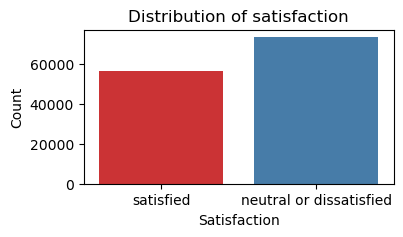

In [95]:
# Visualize the distribution of the satisfaction 
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Satisfaction', palette='Set1')
plt.title('Distribution of satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

In [96]:
#Print out the percentage of satisfied vs neutral_or_dissatisfied
satisfied_percent = (df['Satisfaction'] == 'satisfied').sum() / len(df) * 100
neutral_or_dissatisfied_percent = (df['Satisfaction'] == 'neutral or dissatisfied').sum() / len(df) * 100
print("Percentage of satisfied: {:.2f}%".format(satisfied_percent))
print("Percentage of neutral or dissatisfied: {:.2f}%".format(neutral_or_dissatisfied_percent))

Percentage of satisfied: 43.45%
Percentage of neutral or dissatisfied: 56.55%


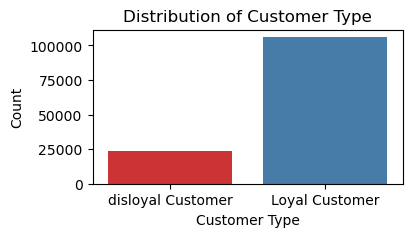

In [97]:
# Visualize the distribution of the loyalty
plt.figure(figsize=(4, 2))
sns.countplot(data=df, x='Customer Type', palette='Set1')
plt.title('Distribution of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

## That's not balanced data!

**Resampling 'Customer Type'**

In [98]:
#let's resample the data
loyal_row = df2[df2['Customer Type'] == 1]
disloyal_row = df2[df2['Customer Type'] == 0]
percentage = len(disloyal_row)/float(len(loyal_row))
disloyal_df = df2[df2['Customer Type'] == 0]
loyal_df = df2[df2['Customer Type'] == 1].sample(frac=percentage, random_state=1)

#df_resample = disloyal_df.append(loyal_df)
df_resample = pd.concat([disloyal_df, loyal_df])

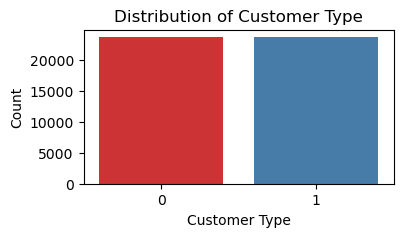

In [99]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df_resample, x='Customer Type', palette='Set1')
plt.title('Distribution of Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

**1.OVERVIEW: FACTOR IMPORTANCE ON SATISFACTION**

In [100]:
#Correlation analysis
correlation_matrix = df2.corr()
print(correlation_matrix)

                                         ID  Satisfaction    Gender  \
ID                                 1.000000      0.013182  0.001361   
Satisfaction                       0.013182      1.000000 -0.011236   
Gender                             0.001361     -0.011236  1.000000   
Customer Type                     -0.001467      0.186017 -0.030958   
Age                                0.020322      0.134091 -0.008996   
Type of Travel                    -0.000935     -0.449861 -0.009503   
Class                              0.097509      0.492947 -0.005774   
Flight Distance                    0.095504      0.298085 -0.003616   
Inflight wifi service             -0.023096      0.283460 -0.005901   
Departure/Arrival time convenient -0.002192     -0.054270 -0.008995   
Ease of Online booking             0.013400      0.168877 -0.005893   
Gate location                     -0.000113     -0.002793  0.000863   
Food and drink                    -0.000510      0.211340 -0.001730   
Online

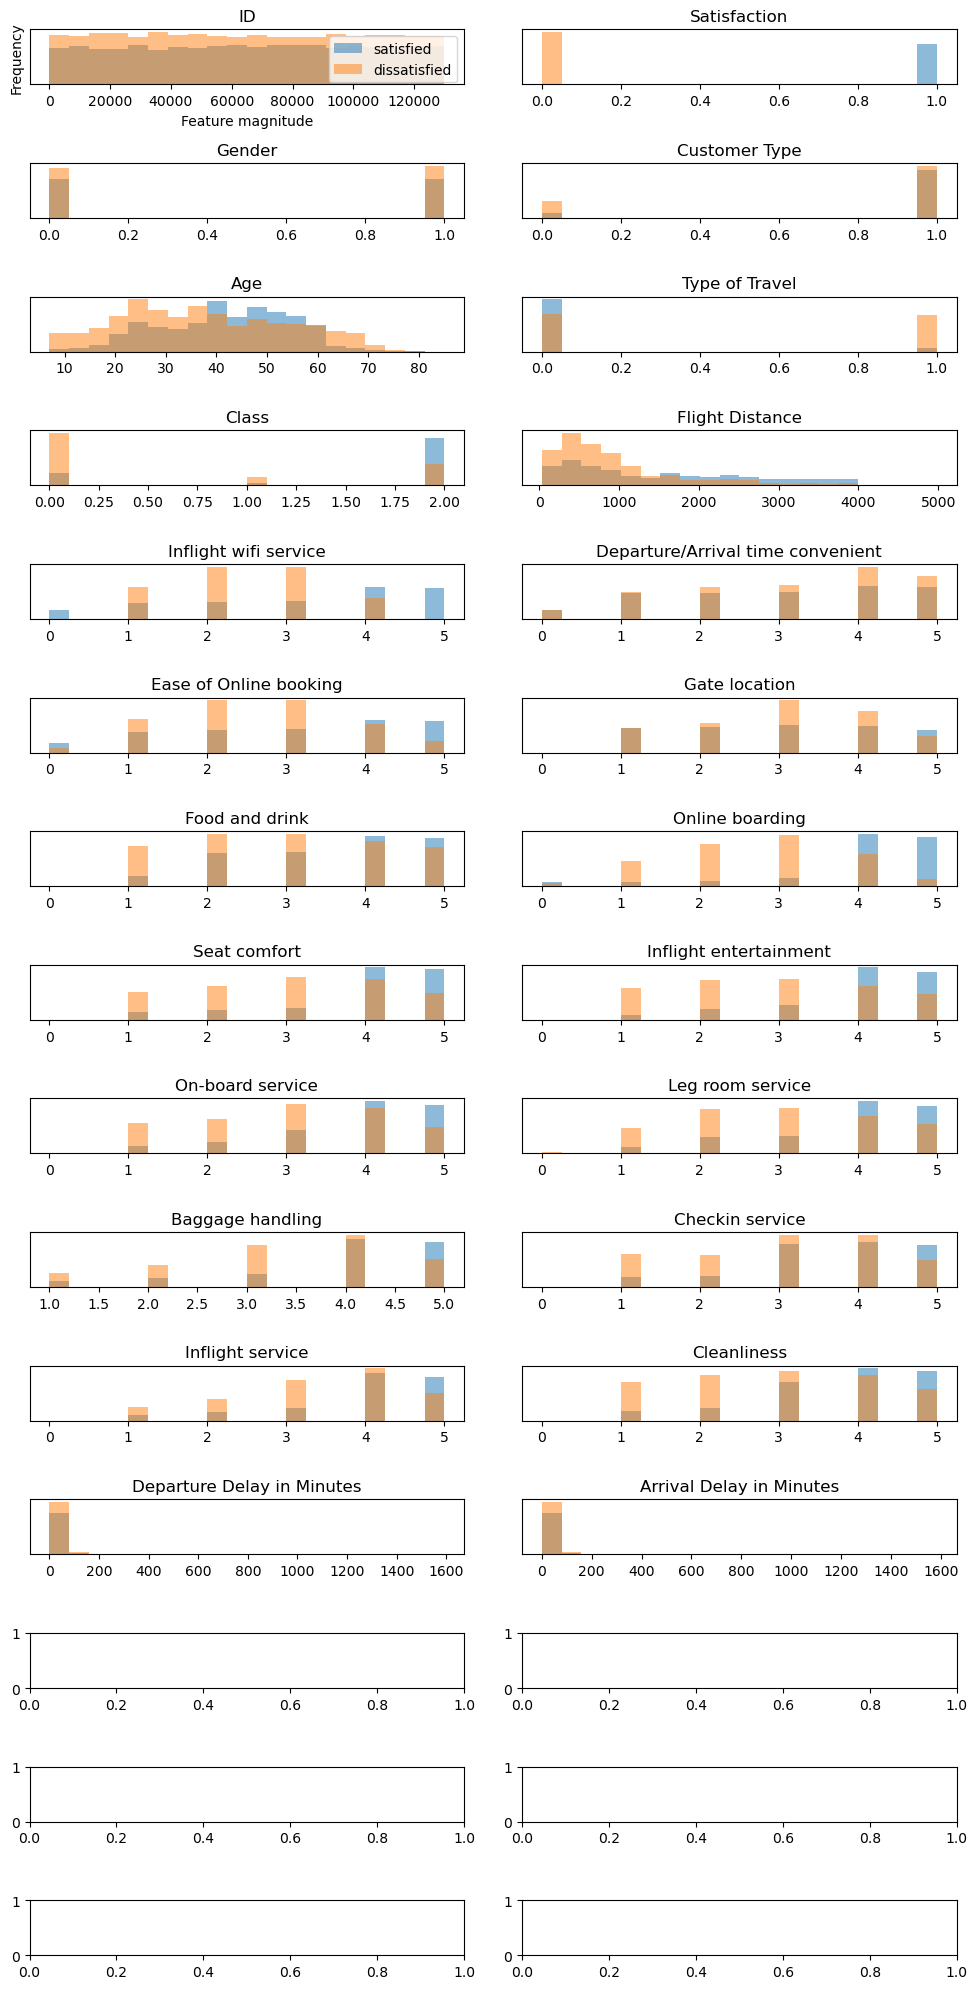

In [101]:
satisfied = df2[df2['Satisfaction'] == 1]
dissatisfied = df2[df2['Satisfaction'] == 0]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i, column in enumerate(df2.columns):  # Use enumerate to get both index and column name
    data_satisfied = satisfied[column].dropna()
    data_dissatisfied = dissatisfied[column].dropna()
    
    _, bins = np.histogram(np.concatenate([data_satisfied, data_dissatisfied]), bins=20)
    
    ax[i].hist(data_satisfied, bins=bins, alpha=.5)
    ax[i].hist(data_dissatisfied, bins=bins, alpha=.5)
    ax[i].set_title(column)  
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["satisfied", "dissatisfied"], loc="best")
fig.tight_layout()

plt.show()

* Satisfaction is not significantly affected by gender, customer type, age, the choice of food and drink, or time convenient.

* Satisfaction levels tend to be higher for business travel than for personal travel.(Guess employer covering travel expenses,more likely to be in a higer class?)

* Class also plays a significant role in influencing satisfaction levels. Most of Business Class are satisfied while Eco and Eco Plus are less likely. Eco Plus IS A TRICK!!

* Interestingly, passengers with longer filgt distance tend to be more satisfied with the airline!! Suggest it related to the inflight sevice provided, especially wifi. Seat comfort and inflight entertainment also matters. 

* Online Borading is another important factor.

Inflight environment is important for customers, like **wifi service, seat comfort, entertainment.**

Passenger satisfaction level don't really influenced by **time convient, food or drink or any delays.**

**2.TRAVEL TYPE VS CLASS**

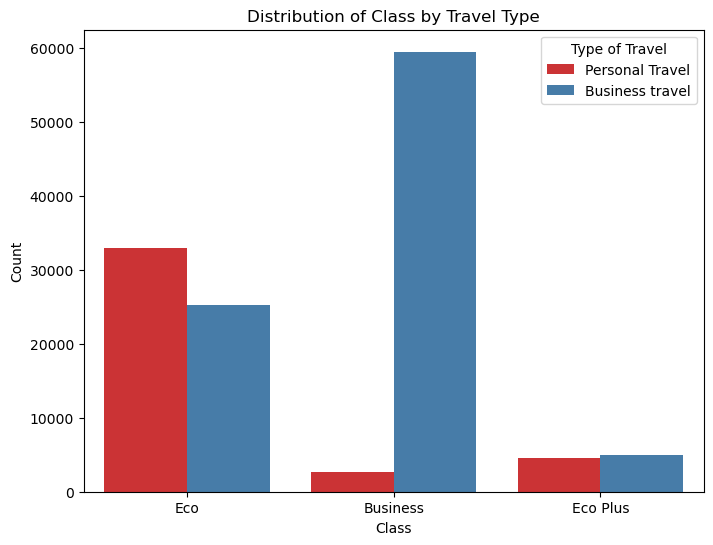

In [102]:
# Satisfaction levels tend to be higher for business travel than for personal travel.
## Since Class also plays a significant role in influencing satisfaction levels. 
## Guess employer covering travel expenses, so they're more likely to be in a higher class?

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Type of Travel', data=df, palette='Set1')
plt.title('Distribution of Class by Travel Type')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [103]:
# Most of Business Class are satisfied while Eco and Eco Plus are less likely. ECO PLUS IS A TRICK!!
# who's buying Eco Plus

print("Percentage of Eco Passenger:",round(len(df2[df2["Class"]==0])/len(df2),2))
print("Percentage of Eco-Plus Passenger:",round(len(df2[df2["Class"]==1])/len(df2),2))
print("Percentage of Business Passenger:",round(len(df2[df2["Class"]==2])/len(df2),2))


Percentage of Eco Passenger: 0.45
Percentage of Eco-Plus Passenger: 0.07
Percentage of Business Passenger: 0.48


**3.DISTANCE VS INFLIGHT SERVICE**

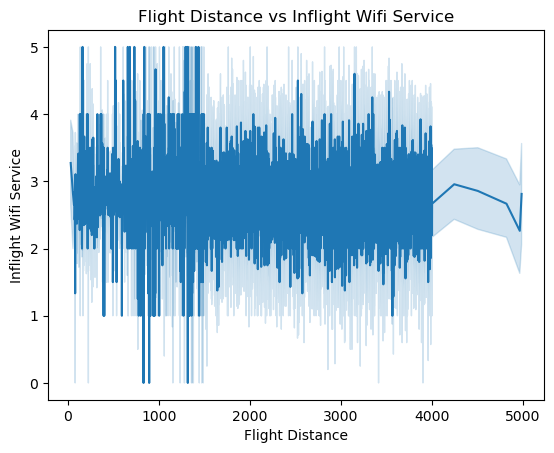

In [104]:
## Interestingly, passengers with longer filgt distance tend to be more satisfied with the airline!! 
## Suggest longer distance flights provide better inflight sevice, especially wifi. Seat comfort and inflight entertainment also matters.
sns.lineplot(x='Flight Distance', y='Inflight wifi service', data=df2)
plt.title('Flight Distance vs Inflight Wifi Service')
plt.xlabel('Flight Distance')
plt.ylabel('Inflight Wifi Service')
plt.show()

## Not really connected, maybe it's usually a paid service, more needed in short distance than longer distance

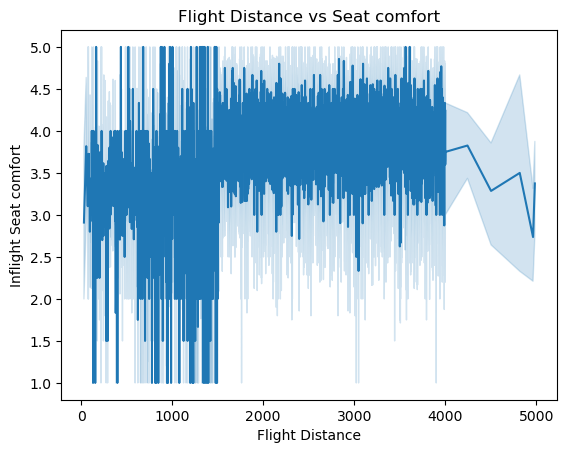

In [105]:
# how about seat comfort and entertainment?
sns.lineplot(x='Flight Distance', y='Seat comfort', data=df2)
plt.title('Flight Distance vs Seat comfort')
plt.xlabel('Flight Distance')
plt.ylabel('Inflight Seat comfort')
plt.show()

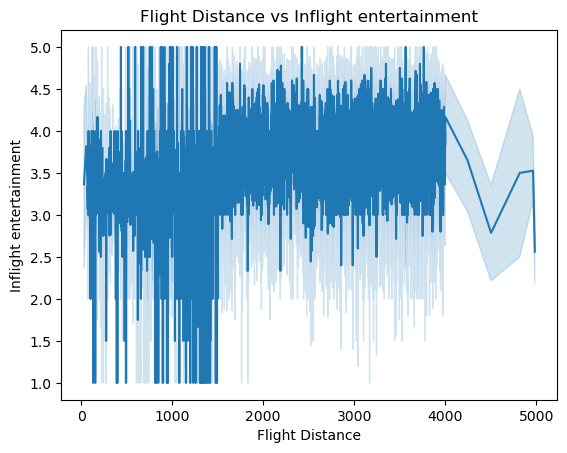

In [106]:
# how about flight distance and entertainment?
sns.lineplot(x='Flight Distance', y='Inflight entertainment', data=df2)
plt.title('Flight Distance vs Inflight entertainment')
plt.xlabel('Flight Distance')
plt.ylabel('Inflight entertainment')

plt.show()

In [107]:
# How many passengers are satisfied with Wifi service
print("Wifi Service:", round(len(df2[(df2["Inflight wifi service"] == 4) | (df2["Inflight wifi service"] == 5)]) / len(df2), 2))

Wifi Service: 0.3


**4.OVERVIEW: FACTOR IMPROTANCE ON CUSTOMER LOYALTY**

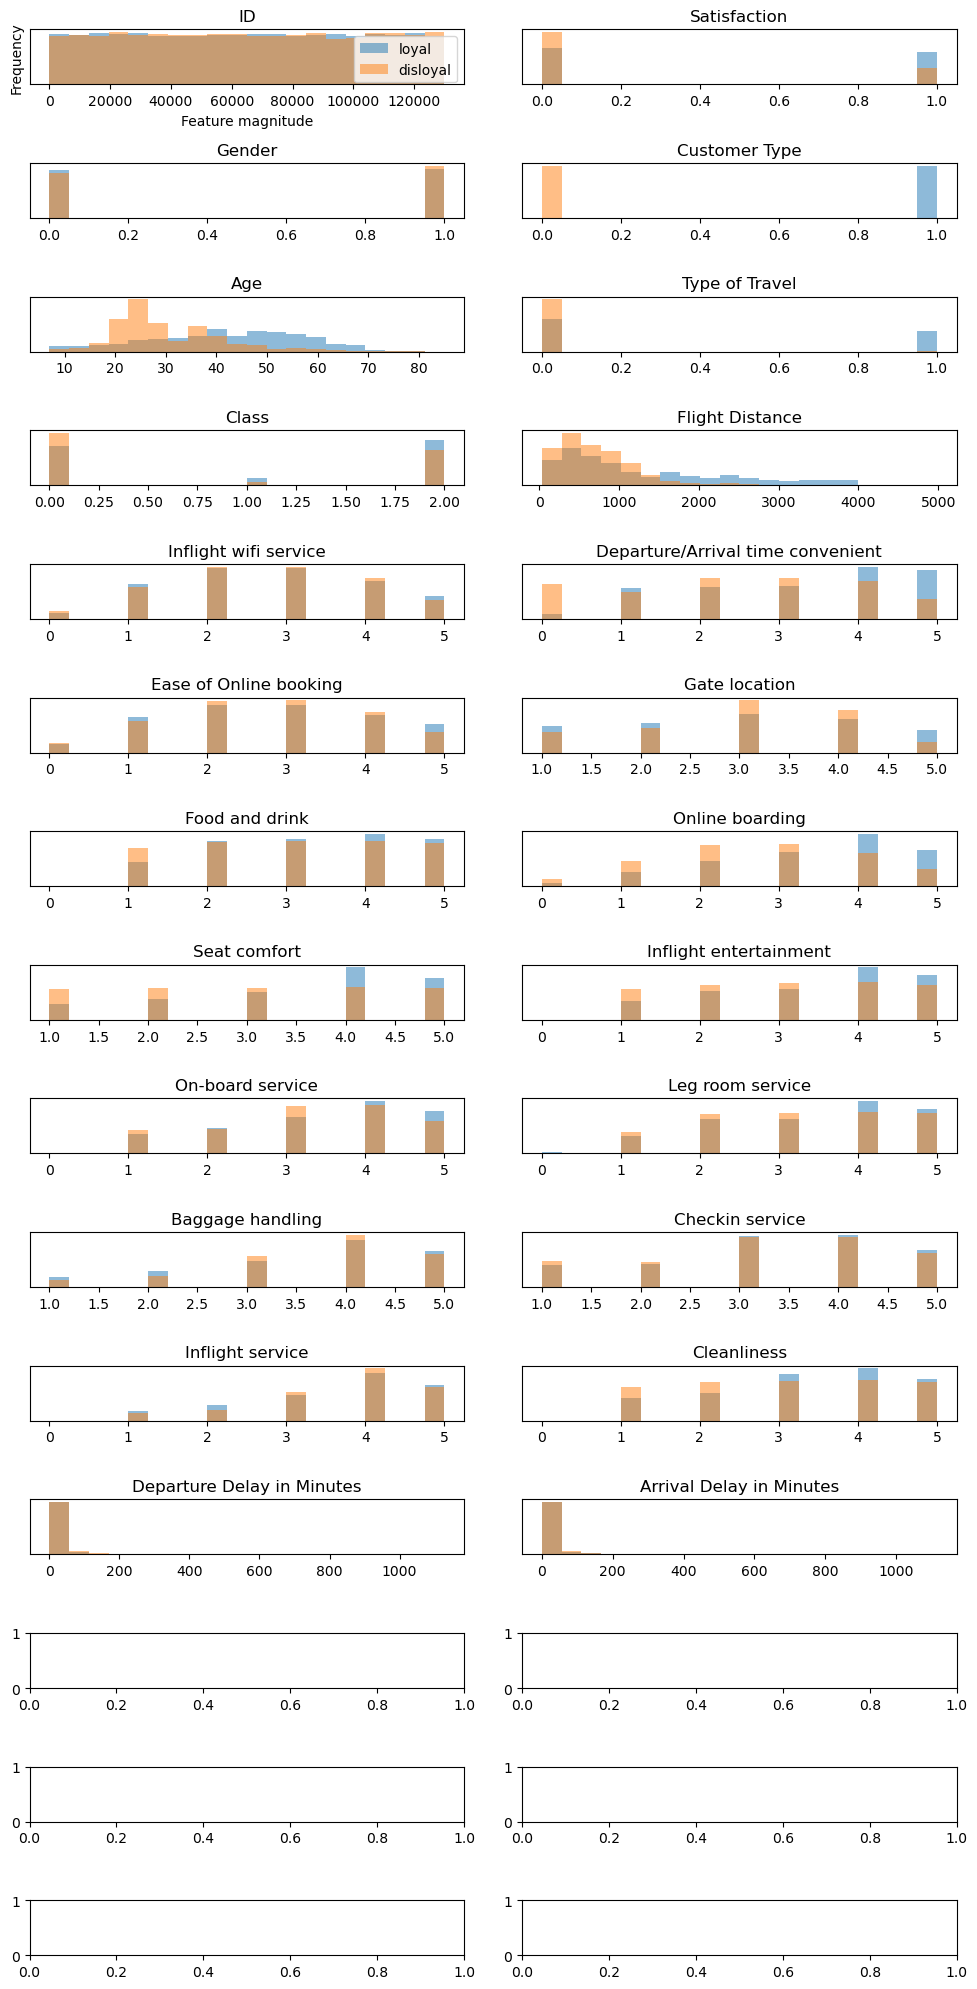

In [108]:
loyal = df_resample[df_resample['Customer Type'] == 1]
disloyal = df_resample[df_resample['Customer Type'] == 0]

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
ax = axes.ravel()

for i, column in enumerate(df_resample.columns):
    data_loyal = loyal[column].dropna()
    data_disloyal = disloyal[column].dropna()

    _, bins = np.histogram(np.concatenate([data_loyal, data_disloyal]), bins=20)

    # Adjust the visualization for the 'Distance' column
    if column == 'Distance':
        ax[i].hist(data_loyal, bins=np.logspace(np.log10(1), np.log10(max(df2['Distance'])), 20), alpha=.5)
        ax[i].hist(data_disloyal, bins=np.logspace(np.log10(1), np.log10(max(df2['Distance'])), 20), alpha=.5)
    else:
        ax[i].hist(data_loyal, bins=bins, alpha=.5)
        ax[i].hist(data_disloyal, bins=bins, alpha=.5)

    ax[i].set_title(column)
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["loyal", "disloyal"], loc="best")
fig.tight_layout()

plt.show()

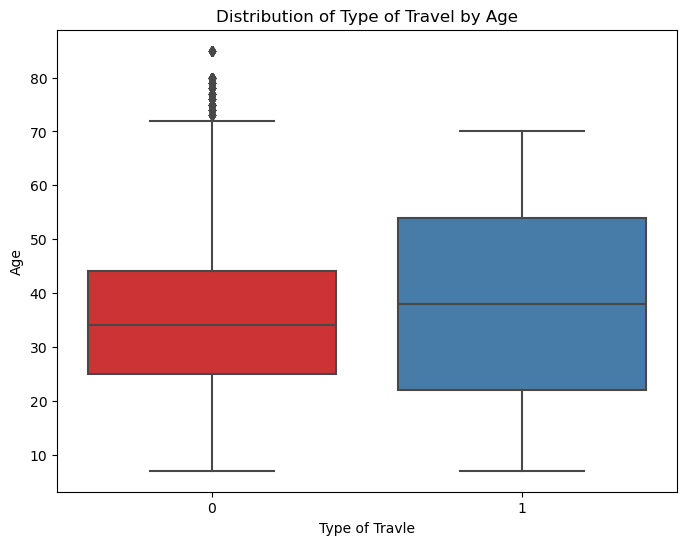

In [109]:
# What is the age distribution of business passengers

plt.figure(figsize=(8, 6))
sns.boxplot(x='Type of Travel', y='Age', data=df_resample, palette='Set1')
plt.title('Distribution of Type of Travel by Age')
plt.xlabel('Type of Travle')
plt.ylabel('Age')
plt.show()

**5.DOUBLE CHECK (narrow down the scope)**

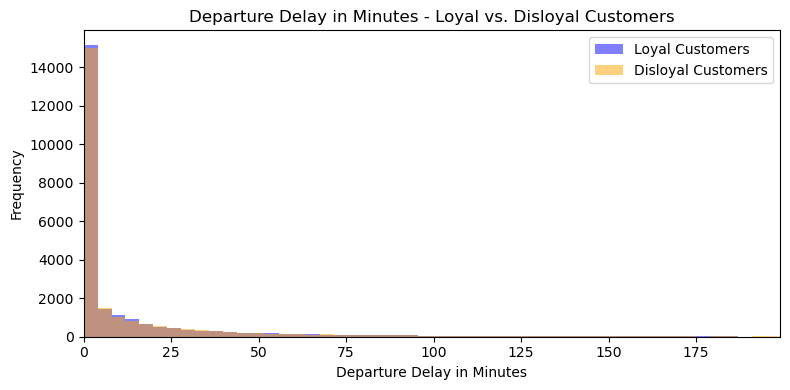

In [110]:
# check the effect of departure delay on Customer Loyalty solely. As the variance of it is high.


loyal = df_resample[df_resample['Customer Type'] == 1]
disloyal = df_resample[df_resample['Customer Type'] == 0]

fig, ax = plt.subplots(figsize=(8, 4))

# Extract the specific column for analysis
column = 'Departure Delay in Minutes'
data_loyal = loyal[loyal[column] < 200][column].dropna()
data_disloyal = disloyal[disloyal[column] < 200][column].dropna()

_, bins = np.histogram(np.concatenate([data_loyal, data_disloyal]), bins=50)

# Plot histograms for loyal and disloyal customers
ax.hist(data_loyal, bins=bins, alpha=.5, color='blue', label='Loyal Customers')
ax.hist(data_disloyal, bins=bins, alpha=.5, color='orange', label='Disloyal Customers')

# Set title and labels
ax.set_title(f'{column} - Loyal vs. Disloyal Customers')
ax.set_xlabel(column)
ax.set_ylabel("Frequency")
ax.set_xlim(0, max(bins))

# Display legend
ax.legend()

plt.tight_layout()
plt.show()


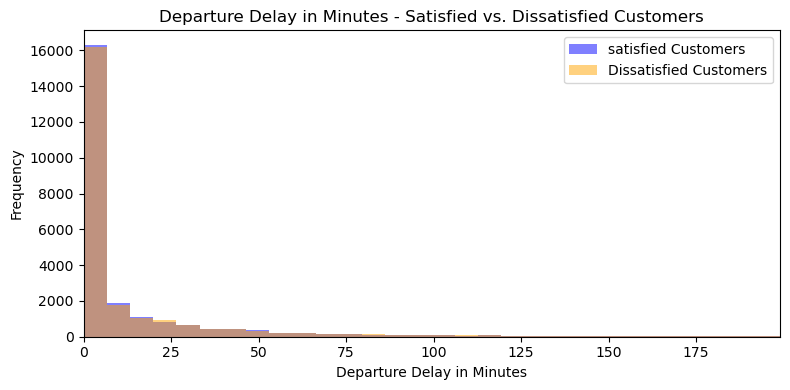

In [111]:
# Also check for the impact on Satisfaction.

satisfied = df2[df2['Satisfaction'] == 1]
dissatisfied = df2[df2['Satisfaction'] == 0]

fig, ax = plt.subplots(figsize=(8, 4))

# Extract the specific column for analysis
column = 'Departure Delay in Minutes'
data_satisfied = satisfied[satisfied[column] < 200][column].dropna()
data_dissatisfied = dissatisfied[dissatisfied[column] < 200][column].dropna()

_, bins = np.histogram(np.concatenate([data_satisfied, data_dissatisfied]), bins=30)

# Plot histograms for loyal and disloyal customers
ax.hist(data_loyal, bins=bins, alpha=.5, color='blue', label='satisfied Customers')
ax.hist(data_disloyal, bins=bins, alpha=.5, color='orange', label='Dissatisfied Customers')

# Set title and labels
ax.set_title(f'{column} - Satisfied vs. Dissatisfied Customers')
ax.set_xlabel(column)
ax.set_ylabel("Frequency")
ax.set_xlim(0, max(bins))

# Display legend
ax.legend()

plt.tight_layout()
plt.show()

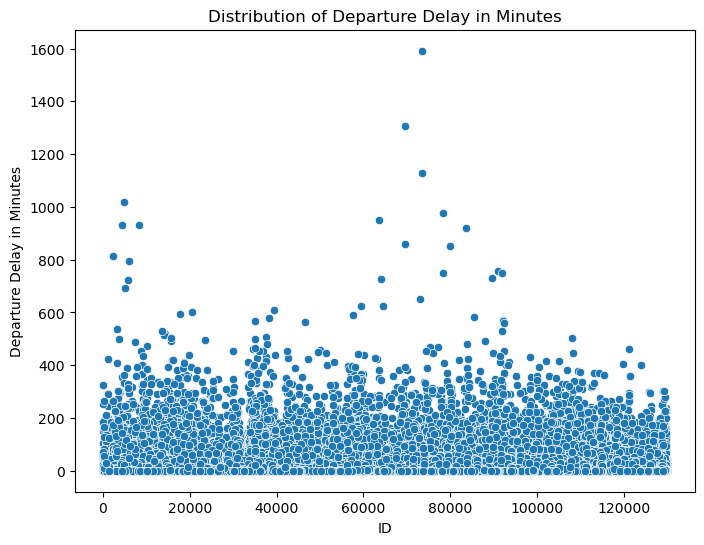

In [112]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ID',y='Departure Delay in Minutes', data=df, palette='Set1')
plt.title('Distribution of Departure Delay in Minutes')
plt.xlabel('ID')
plt.ylabel('Departure Delay in Minutes')
plt.show()

In [113]:
# Average Departure/Arrival delay tiime
print("Avg Departure delay in minutes:",round(df2['Departure Delay in Minutes'].mean(),2))
print("Avg Arrival delay in minutes:",round(df2['Arrival Delay in Minutes'].mean(),2))
print("Max Departure delay in hours:",round(df2['Departure Delay in Minutes'].max()/60,2))
print("Max Arrival delay in hours:",round(df2['Arrival Delay in Minutes'].max()/60,2))

Avg Departure delay in minutes: 14.71
Avg Arrival delay in minutes: 15.09
Max Departure delay in hours: 26.53
Max Arrival delay in hours: 26.4


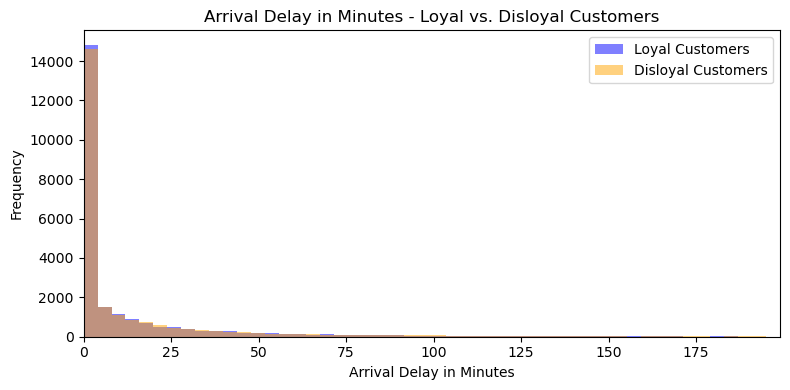

In [114]:
# check the effect of Arrival delay on Customer Loyalty solely. As the variance of it is high.
loyal = df_resample[df_resample['Customer Type'] == 1]
disloyal = df_resample[df_resample['Customer Type'] == 0]

fig, ax = plt.subplots(figsize=(8, 4))

# Extract the specific column for analysis
column = 'Arrival Delay in Minutes'
data_loyal = loyal[loyal[column] < 200][column].dropna()
data_disloyal = disloyal[disloyal[column] < 200][column].dropna()

_, bins = np.histogram(np.concatenate([data_loyal, data_disloyal]), bins=50)

# Plot histograms for loyal and disloyal customers
ax.hist(data_loyal, bins=bins, alpha=.5, color='blue', label='Loyal Customers')
ax.hist(data_disloyal, bins=bins, alpha=.5, color='orange', label='Disloyal Customers')

# Set title and labels
ax.set_title(f'{column} - Loyal vs. Disloyal Customers')
ax.set_xlabel(column)
ax.set_ylabel("Frequency")
ax.set_xlim(0, max(bins))

# Display legend
ax.legend()

plt.tight_layout()
plt.show()


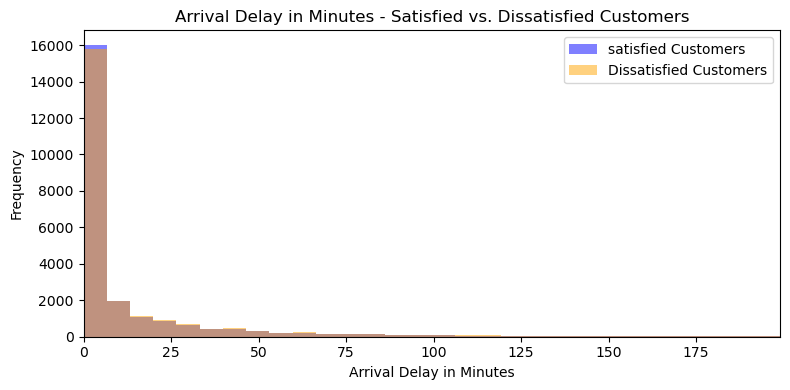

In [115]:
satisfied = df2[df2['Satisfaction'] == 1]
dissatisfied = df2[df2['Satisfaction'] == 0]

fig, ax = plt.subplots(figsize=(8, 4))

# Extract the specific column for analysis
column = 'Arrival Delay in Minutes'
data_satisfied = satisfied[satisfied[column] < 200][column].dropna()
data_dissatisfied = dissatisfied[dissatisfied[column] < 200][column].dropna()

_, bins = np.histogram(np.concatenate([data_satisfied, data_dissatisfied]), bins=30)

# Plot histograms for loyal and disloyal customers
ax.hist(data_loyal, bins=bins, alpha=.5, color='blue', label='satisfied Customers')
ax.hist(data_disloyal, bins=bins, alpha=.5, color='orange', label='Dissatisfied Customers')

# Set title and labels
ax.set_title(f'{column} - Satisfied vs. Dissatisfied Customers')
ax.set_xlabel(column)
ax.set_ylabel("Frequency")
ax.set_xlim(0, max(bins))

# Display legend
ax.legend()

plt.tight_layout()
plt.show()

**Based on above EDA analysis, assume that below factors will affect customer satisfactions:**
- Type of Travel
- Class
- Flight Distance 
- Online Boarding
- On-board Service
- Inflight Entertainment
- Inflight Wifi Service
- Seat Comfort
- Leg room service
- Cleanliness

**Also, assume that below factors will affect customer loyalty:**
- Age
- Type of Travel
- Flight Distance
- Departure/Arrival Time Convenience
- Online Boarding
- Inflight Entertainment
- Inflight Wifi Service
- Seat Comfort
- Leg room service
- Cleanliness


## **Prediction Analysis: Are the passengers satisfied?**

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**Data Prerpocessing**

In [117]:
# Define the features (X) and target variable (y)
X = df2.drop(columns=['Satisfaction', 'ID'], axis=1)
y = df2['Satisfaction']

# Define the column indices for categorical and numerical variables
col_cat = ['Gender', 'Customer Type', 'Class', 'Type of Travel']
col_num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
           'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
           'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
           'Inflight entertainment', 'On-board service', 'Leg room service',
           'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

# Replace 0 with NaN only for specific columns
X[col_num] = X[col_num].replace({'Inflight wifi service': {0: np.nan},
                                 'Departure/Arrival time convenient': {0: np.nan},
                                 'Ease of Online booking': {0: np.nan},
                                 'Gate location': {0: np.nan},
                                 'Food and drink': {0: np.nan},
                                 'Online boarding': {0: np.nan},
                                 'Seat comfort': {0: np.nan},
                                 'Inflight entertainment': {0: np.nan},
                                 'On-board service': {0: np.nan},
                                 'Leg room service': {0: np.nan},
                                 'Baggage handling': {0: np.nan},
                                 'Checkin service': {0: np.nan},
                                 'Inflight service': {0: np.nan},
                                 'Cleanliness': {0: np.nan}})

# Calculate column means for specified columns
col_means = X[col_num].mean()

# Replace NaN with column means
X[col_num] = X[col_num].fillna(col_means)

# Create separate pipelines for categorical and numerical variables
pipe_cat = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(StandardScaler())

# Create a column transformer to apply the respective pipelines to specified columns
preprocessor = make_column_transformer(
    (pipe_cat, col_cat),
    (pipe_num, col_num),
    remainder='passthrough')

**Split data into train-validation and test sets**

In [118]:
from sklearn.model_selection import train_test_split

#Split the original data into train-validate set (90%) and test set (10%) using random state = 0.
#Then, split the train-validate set into training set (80%) and validation set (20%) using random state = 0.
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.1, stratify = y, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, stratify = y_trainval, test_size = 0.2, random_state = 0)

#X_trainval.shape (116892, 22)

### Logistic Regression

In [119]:
# Create a pipeline containing preprocessing and logistic regression model
model = make_pipeline(preprocessor, LogisticRegression())

# Create a pipeline with preprocessing and logistic regression model using Pipeline
pipe_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(random_state=0, multi_class='auto', solver='lbfgs'))
])

# Define a parameter grid for grid search
param_grid = {'classifier__max_iter': [1000, 10000, 100000],
             'classifier__C': [0.001, 0.01, 0.1, 1, 10]}

# Use GridSearchCV to find the best parameters
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True)

# Train on train-validation set
grid_lr.fit(X_trainval, y_trainval)

# Extract the best parameters and evaluate the model
best_params = grid_lr.best_params_
accuracy = grid_lr.score(X_trainval, y_trainval)

print("LogisticRegression Best parameters:", best_params)
print("Best cross-validation score for LogisticRegression: {:.3f}".format(grid_lr.best_score_))

LogisticRegression Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000}
Best cross-validation score for LogisticRegression: 0.885


In [120]:
# Test the best model on the test set
accuracy_lr = grid_lr.score(X_test, y_test)
print('Test set accuracy of the best model: {:.3f}'.format(accuracy_lr))

Test set accuracy of the best model: 0.883


In [121]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on the test set
y_pred_proba = grid_lr.predict_proba(X_test)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba[:, 1])  # Assuming binary classification

print('AUC score on the test set:', auc_score)

AUC score on the test set: 0.9497456501648397


### Decision Tree

In [122]:
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
import graphviz
from sklearn.tree import export_graphviz

In [123]:
# Define the pipeline for Decision Tree
pipe_dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(random_state=0)
)

# Define the parameter grid for Decision Tree
param_grid_dt = {'decisiontreeclassifier__max_depth': [3, 4, 5, 6]}

# Instantiate GridSearchCV for Decision Tree
grid_dt = GridSearchCV(pipe_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, return_train_score=True)

# Fit the Decision Tree model
grid_dt.fit(X_train, y_train)

# Get the best parameters for Decision Tree
best_params = grid_dt.best_params_

# Evaluate the Decision Tree model
accuracy = grid_dt.score(X_val, y_val)

# Print results for Decision Tree
print("Best parameters for Decision Tree:", best_params)
print("Best cross-validation score for Decision Tree: {:.3f}".format(grid_dt.best_score_))

Best parameters for Decision Tree: {'decisiontreeclassifier__max_depth': 6}
Best cross-validation score for Decision Tree: 0.921


In [124]:
accuracy_dt = grid_dt.score(X_test, y_test)
print(f'Test set accuracy score of DecisionTree is {accuracy_dt:.3f}')

Test set accuracy score of DecisionTree is 0.914


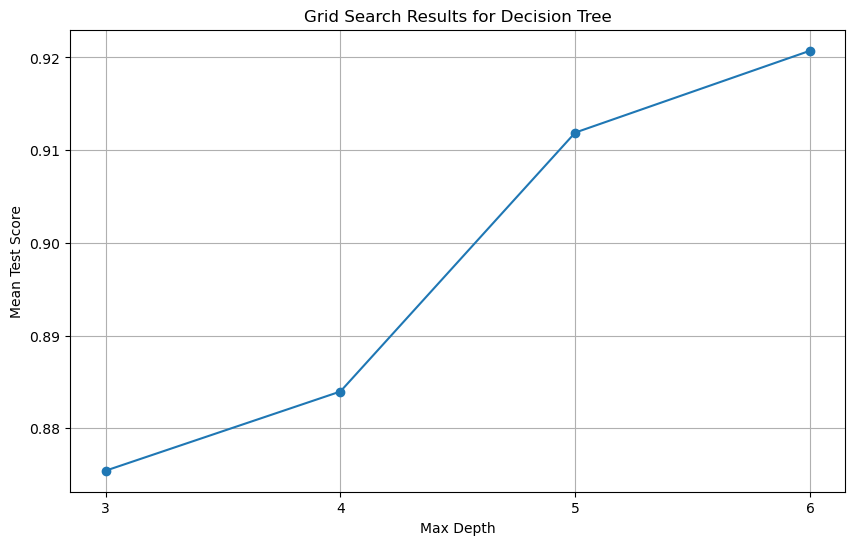

In [125]:
# Extract the hyperparameter values and corresponding mean test scores
param_values = [params['decisiontreeclassifier__max_depth'] for params in grid_dt.cv_results_['params']]
mean_test_scores = grid_dt.cv_results_['mean_test_score']

# Check for and handle None values
param_values = [0 if value is None else value for value in param_values]
mean_test_scores = [0 if value is None else value for value in mean_test_scores]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_values, mean_test_scores, marker='o', linestyle='-')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.xticks(np.arange(min(param_values), max(param_values)+1, 1))
plt.grid(True)
plt.show()

In [126]:
# Predict probabilities on the test set
y_pred_proba = grid_dt.predict_proba(X_test)

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, y_pred_proba[:, 1])  # Assuming binary classification

print('AUC score on the test set:', auc_score_dt)

AUC score on the test set: 0.9741228703501642


### SVM

In [127]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [128]:
# Create a pipeline with preprocessing and LinearSVC classifier
pipe_svcs = Pipeline([('preprocessing', preprocessor), ('classifier', LinearSVC(random_state=0))])

# Define the parameter grid for GridSearchCV
param_grid = {'classifier__max_iter': [100, 1000, 10000],
             'classifier__C': [0.001, 0.01, 0.1, 1.0, 10]}

# Create a GridSearchCV object for hyperparameter tuning
grid_svcs = GridSearchCV(pipe_svcs, param_grid=param_grid, cv=5, n_jobs=-1, return_train_score=True)

# Fit the grid search to the training data
grid_svcs.fit(X_trainval, y_trainval)

# Display the best parameters found by GridSearchCV
grid_svcs.best_params_

/Users/alice/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alice/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alice/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alice/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/alice/anaconda3/l

{'classifier__C': 10, 'classifier__max_iter': 10000}

In [129]:
# Calculate accuracy on the test set using the best model
accuracy = grid_svcs.score(X_trainval, y_trainval)
# Print the best cross-validation score and accuracy on the test set
print("Best cross-validation score for SVM: {:.3f}".format(grid_svcs.best_score_))

Best cross-validation score for SVM: 0.885


In [130]:
# Test the best model {'classifier__C': 10, 'classifier__max_iter': 10000} on the test set
accuracy_svm = grid_svcs.score(X_test, y_test)
print('Test set accuracy of the best SVM model: {:.3f}'.format(accuracy_svm))

Test set accuracy of the best SVM model: 0.883


In [131]:
print("confusion matrix:\n", confusion_matrix(y_test,grid_svcs.predict(X_test)))
print("SVM Report:\n", classification_report(y_test, grid_svcs.predict(X_test)))

confusion matrix:
 [[6609  736]
 [ 782 4861]]
SVM Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      7345
           1       0.87      0.86      0.86      5643

    accuracy                           0.88     12988
   macro avg       0.88      0.88      0.88     12988
weighted avg       0.88      0.88      0.88     12988



In [132]:
# Obtain the best estimator from the grid search
best_estimator_svcs = grid_svcs.best_estimator_

# Predict probabilities on the test set using the best estimator, for SVM use .decision_function()
y_pred_proba_svcs = best_estimator_svcs.decision_function(X_test)

# Calculate the AUC score
auc_score_svcs = roc_auc_score(y_test, y_pred_proba_svcs)

print('AUC score on the test set:', auc_score_svcs)

AUC score on the test set: 0.9497346001305014


### Random Forest - BEST MODEL

In [133]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for the Random Forest classifier
pipe_rf = Pipeline([('preprocessing', preprocessor), ('classifier', RandomForestClassifier())])

# Set the hyperparameter grid for grid search
param_grid = {'classifier__max_features': [13],
              'classifier__max_depth': [6,8,10,12,14,16,17,18,19,20,21,22,23,24,25]}

# Use grid search to optimize hyperparameters, where cv specifies the number of folds for cross-validation
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid, cv=5, return_train_score=True)

# Fit the model on the training set and select the best hyperparameter combination
grid_rf.fit(X_trainval, y_trainval)

# Output the best hyperparameter combination
best_params_rf = grid_rf.best_params_
print("Best hyperparameters:", best_params_rf)

Best hyperparameters: {'classifier__max_depth': 22, 'classifier__max_features': 13}


In [134]:
results = pd.DataFrame(grid_rf.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.574939,0.226712,0.095541,0.006850,6,13,"{'classifier__max_depth': 6, 'classifier__max_...",0.927798,0.925745,0.927924,0.936008,0.928309,0.929157,0.003540,15,0.928566,0.928577,0.930299,0.932384,0.929668,0.929899,0.001408
1,9.206385,0.348708,0.106660,0.003856,8,13,"{'classifier__max_depth': 8, 'classifier__max_...",0.943625,0.943496,0.942809,0.948071,0.943751,0.944350,0.001889,14,0.945537,0.945195,0.946115,0.945110,0.946211,0.945634,0.000456
2,10.425226,0.219030,0.119114,0.006605,10,13,"{'classifier__max_depth': 10, 'classifier__max...",0.953035,0.952992,0.951365,0.955813,0.952391,0.953119,0.001476,13,0.957150,0.956958,0.957482,0.956691,0.957525,0.957161,0.000316
3,11.319778,0.147170,0.130495,0.009528,12,13,"{'classifier__max_depth': 12, 'classifier__max...",0.958766,0.959707,0.956583,0.960946,0.958166,0.958834,0.001466,12,0.967074,0.966828,0.967909,0.966305,0.967342,0.967091,0.000533
4,12.072810,0.157627,0.144299,0.007387,14,13,"{'classifier__max_depth': 14, 'classifier__max...",0.962060,0.962873,0.960690,0.964668,0.961802,0.962418,0.001324,11,0.974945,0.974699,0.975608,0.974485,0.974870,0.974921,0.000378
5,12.794212,0.548317,0.155966,0.006398,16,13,"{'classifier__max_depth': 16, 'classifier__max...",0.962787,0.963215,0.961288,0.965266,0.962700,0.963051,0.001283,10,0.981061,0.980955,0.981906,0.980495,0.980805,0.981044,0.000471
6,13.277025,0.394750,0.185162,0.033151,17,13,"{'classifier__max_depth': 17, 'classifier__max...",0.963215,0.964455,0.961887,0.965438,0.962871,0.963573,0.001242,9,0.984109,0.983831,0.984280,0.984195,0.984409,0.984165,0.000194
7,13.069076,0.327886,0.165922,0.003417,18,13,"{'classifier__max_depth': 18, 'classifier__max...",0.963856,0.965396,0.962272,0.964796,0.963342,0.963933,0.001095,6,0.988066,0.988023,0.987959,0.987467,0.988141,0.987931,0.000239
8,13.725432,0.496170,0.169316,0.008710,19,13,"{'classifier__max_depth': 19, 'classifier__max...",0.964113,0.964113,0.962016,0.965737,0.962871,0.963770,0.001264,8,0.991819,0.990942,0.991071,0.991060,0.991103,0.991199,0.000315
9,13.567335,0.193920,0.186038,0.011735,20,13,"{'classifier__max_depth': 20, 'classifier__max...",0.963343,0.964541,0.961887,0.965266,0.963855,0.963779,0.001146,7,0.994118,0.993541,0.993113,0.993894,0.994161,0.993766,0.000393


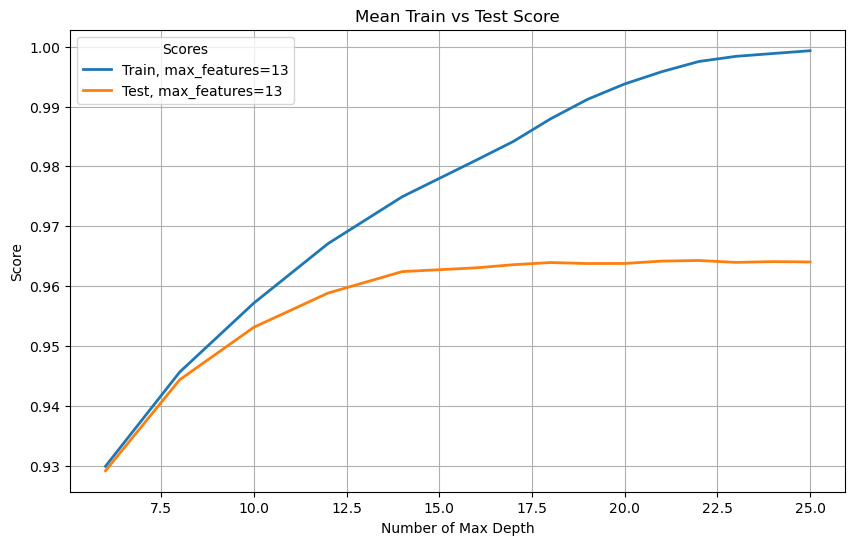

In [135]:
mean_test_score=grid_rf.cv_results_['mean_test_score']
max_features=param_grid['classifier__max_features']
max_depth=param_grid['classifier__max_depth']
mean_test_score=np.array(mean_test_score).reshape(len(max_depth),len(max_features))
mean_test_score = grid_rf.cv_results_['mean_test_score']
mean_train_score = grid_rf.cv_results_['mean_train_score']
max_features = param_grid['classifier__max_features']
max_depth = param_grid['classifier__max_depth']

# Reshaping mean_test_score to match the length of max_depth and max_features
mean_test_score = np.array(mean_test_score).reshape(len(max_depth), len(max_features))
mean_train_score = np.array(mean_train_score).reshape(len(max_depth), len(max_features))

plt.figure(figsize=(10, 6))
for i, feature in enumerate(max_features):
    plt.plot(max_depth, mean_train_score[:, i], label=f"Train, max_features={feature}", linewidth=2)
    plt.plot(max_depth, mean_test_score[:, i], label=f"Test, max_features={feature}", linewidth=2)

plt.title("Mean Train vs Test Score")
plt.xlabel("Number of Max Depth")
plt.ylabel("Score")

# Adding a legend with a title
plt.legend(title="Scores", loc="best")


# Enabling grid
plt.grid(True)

# Display the plot
plt.show()

**Tuning hyper parameters:**
We first chose the best number of max_features:
- max_features': [10,15,20,25], max_depth': [10,15,20,25] -> max_depth=25, max_features=10
- max_features': [8,10,12,15], max_depth': [15,20,25,30] -> max_depth=25, max_features=12
- max_features': [10,11,12], max_depth': [22,24,26] -> max_depth=24, max_features=12
- max_features': [12,15,18], max_depth': [22,25,28] -> max_depth=28, max_features=12
- max_features': [12], max_depth': [20,22,23,24] -> max_depth=20, max_features=12
- max_features': [12,13], max_depth': [17,20,23] -> max_depth=23, max_features=13
- max_features': [12,13], max_depth': [22,23,24] -> max_depth=24, max_features=13
- max_features': [12,13], max_depth': [22,23,24,25] -> max_depth=25, max_features=13
- max_features': [13], max_depth': [21,22,23,24,25] -> max_depth=22, max_features=13
- max_features': [13], max_depth': [22,23] -> max_depth=23, max_features=13

**Tuning hyper parameters:** Then chose the best number of max_depth, to check whether depth of 23 under 13 features will make the model overfitting.
- after plotting the train score & test score by number of max depth from 6 to 25, the test score reach a pleateu after max depth = 15
- therefore, fix the best parameters at max_depth = 15, max_features = 13
  

In [136]:
pipe_rf_best = Pipeline([('preprocessing', preprocessor), 
                         ('classifier', RandomForestClassifier(max_depth=15, max_features=13, random_state=0))])
pipe_rf_best.fit(X_trainval, y_trainval)
accuracy_rf = pipe_rf_best.score(X_test, y_test)
print(f'Test set accuracy score of the RandomRorest is {accuracy_rf:.3f}')

Test set accuracy score of the RandomRorest is 0.961


In [137]:
print("confusion matrix:\n", confusion_matrix(y_test,grid_rf.predict(X_test)))
print("RandomForest Report:\n", classification_report(y_test, grid_rf.predict(X_test)))

confusion matrix:
 [[7201  144]
 [ 327 5316]]
RandomForest Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      7345
           1       0.97      0.94      0.96      5643

    accuracy                           0.96     12988
   macro avg       0.97      0.96      0.96     12988
weighted avg       0.96      0.96      0.96     12988



In [138]:
# Predict probabilities on the test set using the trained model
y_pred_proba_rf = pipe_rf_best.predict_proba(X_test)

# Calculate the AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

print('AUC score on the test set:', auc_score_rf)

AUC score on the test set: 0.9940773746083481


**One tree example based on the most important feature:**

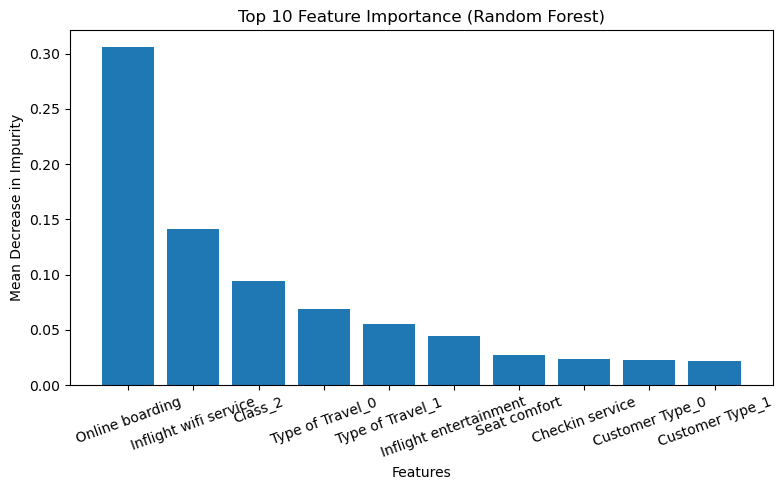

In [139]:
# Get feature importances from the RandomForestClassifier
feature_importances = pipe_rf_best.named_steps['classifier'].feature_importances_

# Get the names of all features after one-hot encoding
cat_encoder = pipe_rf_best.named_steps['preprocessing'].transformers_[0][1].named_steps['onehotencoder']
onehot_columns = list(cat_encoder.categories_)
onehot_feature_names = [f"{col}_{val}" for col, cats in zip(col_cat, onehot_columns) for val in cats]
all_feature_names = onehot_feature_names + col_num

# Sort indices by feature importances
indices = np.argsort(feature_importances)[::-1]

# Get the top 10 important feature indices and names
top_indices = indices[:10]
top_feature_names = [all_feature_names[i] for i in top_indices]
top_feature_importances = feature_importances[top_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Top 10 Feature Importance (Random Forest)")
plt.bar(range(len(top_feature_importances)), top_feature_importances, align='center')
plt.xticks(range(len(top_feature_importances)), top_feature_names, rotation=90)
plt.ylabel('Mean Decrease in Impurity')
plt.xlabel('Features')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

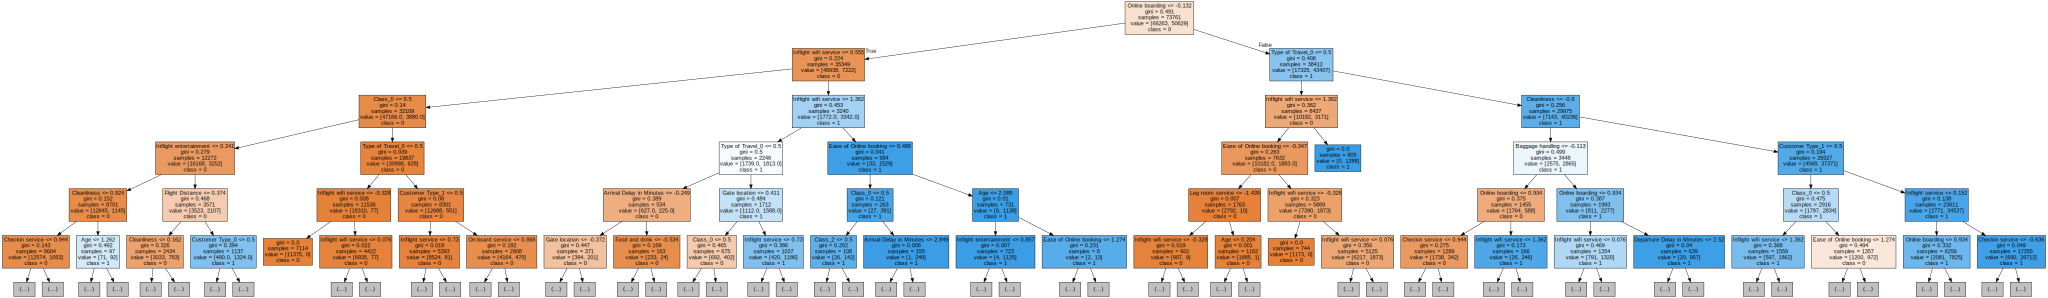

In [140]:
# Get the index of the most important feature
most_important_feature_index = top_indices[0]

# Choose a tree from the Random Forest model that splits on the most important feature
selected_tree = None
for tree in pipe_rf_best.named_steps['classifier'].estimators_:
    if tree.tree_.feature[0] == most_important_feature_index:
        selected_tree = tree
        break

if selected_tree is not None:
    # Export the selected tree to Graphviz format with a maximum depth of 5
    tree_dot = export_graphviz(selected_tree, out_file=None, feature_names=all_feature_names, class_names=['0', '1'], filled=True, max_depth=5)

    # Render the decision tree using Graphviz
    graph = graphviz.Source(tree_dot, format="png")

    # Display the rendered tree directly in Jupyter Notebook
    graph
else:
    print("No tree found that splits on the most important feature.")

graph

**Correlations Matrix:**

In [141]:
# Concatenate features and target variable into a single DataFrame
df_combined = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = df_combined.corr()

# Extract the correlation of each feature with the target variable
correlation_with_target = correlation_matrix['Satisfaction']

# Print out the correlation of each feature with the target variable
print(correlation_with_target.round(3))

Gender                              -0.011
Customer Type                        0.186
Age                                  0.134
Type of Travel                      -0.450
Class                                0.493
Flight Distance                      0.298
Inflight wifi service                0.382
Departure/Arrival time convenient   -0.050
Ease of Online booking               0.232
Gate location                       -0.003
Food and drink                       0.212
Online boarding                      0.558
Seat comfort                         0.349
Inflight entertainment               0.398
On-board service                     0.322
Leg room service                     0.315
Baggage handling                     0.249
Checkin service                      0.237
Inflight service                     0.245
Cleanliness                          0.307
Departure Delay in Minutes          -0.051
Arrival Delay in Minutes            -0.058
Satisfaction                         1.000
Name: Satis

### Gradient Boosting

In [142]:
from sklearn.ensemble import GradientBoostingClassifier

#Build a gradient boosted tree classifier (can fix max_depth = 6 later) 
gbrt = make_pipeline(preprocessor, GradientBoostingClassifier())

# Compare hyperparameters in the following grid: learning_rate: np.logspace(-2, 0, 3), n_estimators: [5, 10, 50, 100, 200, 500]
np.set_printoptions(precision=6, suppress=True)
param_grid = {
    'gradientboostingclassifier__learning_rate': np.logspace(-2, 0, 3),
    'gradientboostingclassifier__n_estimators': [5, 10, 50, 100, 200, 500]
}

# Use 5-fold GridSearchCV on the train-validate set
grid_gbrt = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True)
grid_gbrt.fit(X_trainval, y_trainval)

grid_gbrt.best_params_
print("Best estimator:\n{}".format(grid_gbrt.best_estimator_))

Best estimator:
Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Class', 'Type of Travel']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Flight Distance',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minute

In [143]:
# Report the best model’s performance on the test set
accuracy_gbrt = grid_gbrt.score(X_test, y_test)
print('Test set accuracy score of the {} is {:.3f}'.format(grid_gbrt.__class__.__name__, accuracy))

Test set accuracy score of the GridSearchCV is 0.885


In [144]:
# Predict probabilities on the test set using the trained model
y_pred_proba_gbrt = grid_gbrt.predict_proba(X_test)

# Calculate the AUC score
auc_score_gbrt = roc_auc_score(y_test, y_pred_proba_gbrt[:, 1])

print('AUC score on the test set:', auc_score_gbrt)

AUC score on the test set: 0.9932427109884026


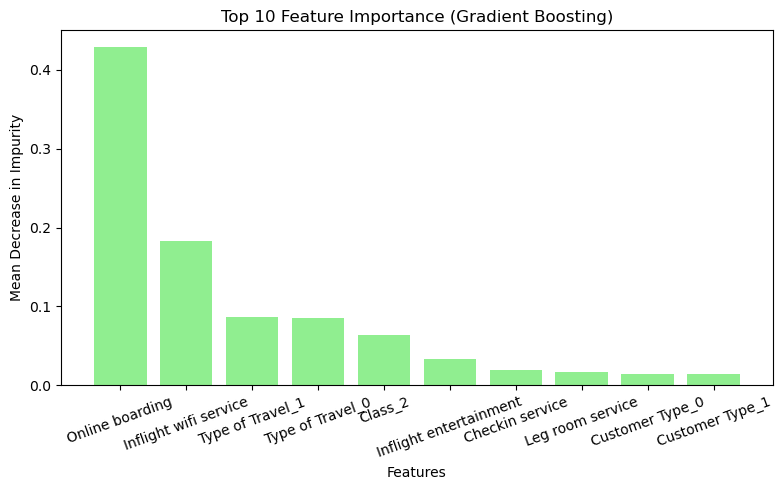

In [145]:
# Retrieve the best Gradient Boosting Classifier model from GridSearchCV
best_gbrt = grid_gbrt.best_estimator_

# Get feature importances from the RandomForestClassifier
feature_importances = best_gbrt.named_steps['gradientboostingclassifier'].feature_importances_

# Get the names of all features after one-hot encoding
cat_encoder = pipe_rf_best.named_steps['preprocessing'].transformers_[0][1].named_steps['onehotencoder']
onehot_columns = list(cat_encoder.categories_)
onehot_feature_names = [f"{col}_{val}" for col, cats in zip(col_cat, onehot_columns) for val in cats]
all_feature_names = onehot_feature_names + col_num

# Sort indices by feature importances
indices = np.argsort(feature_importances)[::-1]

# Get the top 10 important feature indices and names
top_indices = indices[:10]
top_feature_names = [all_feature_names[i] for i in top_indices]
top_feature_importances = feature_importances[top_indices]

# Plot
plt.figure(figsize=(8, 5))
plt.title("Top 10 Feature Importance (Gradient Boosting)")
plt.bar(range(len(top_feature_importances)), top_feature_importances, align='center',color='lightgreen')
plt.xticks(range(len(top_feature_importances)), top_feature_names, rotation=90)
plt.ylabel('Mean Decrease in Impurity')
plt.xlabel('Features')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

### Prediction1 Summary

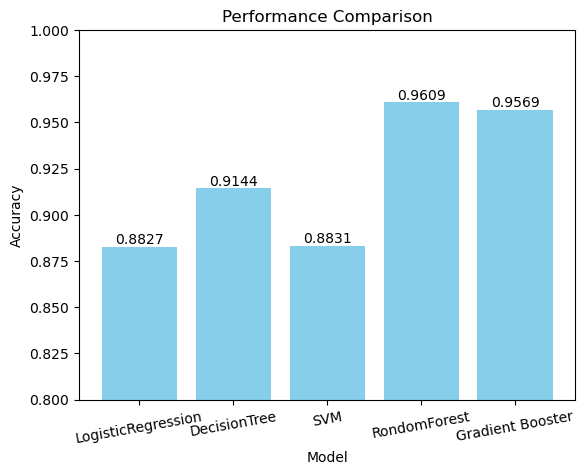

In [146]:
model_accuracy = [accuracy_lr, accuracy_dt, accuracy_svm, accuracy_rf, accuracy_gbrt]
model = ['LogisticRegression', 'DecisionTree','SVM', 'RondomForest', 'Gradient Booster']

bars = plt.bar(model, model_accuracy, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.title('Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=10)
plt.show()

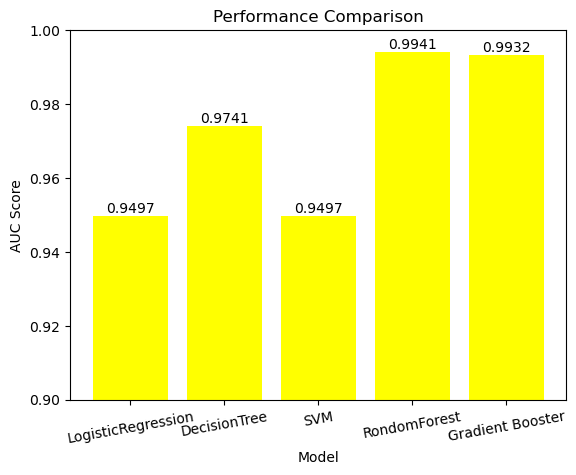

In [147]:
model_auc = [auc_score, auc_score_dt, auc_score_svcs, auc_score_rf, auc_score_gbrt]
model = ['LogisticRegression', 'DecisionTree','SVM', 'RondomForest', 'Gradient Booster']

bars = plt.bar(model, model_auc, color='yellow')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.title('Performance Comparison')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=10)
plt.show()

## **Prediction Analysis: Which customers are at risk of becoming disloyal?**

### Data Prerpocessing

In [161]:
# import satisfaction_2015.xlsx
df = pd.read_excel("satisfaction_2015.xlsx", header=0)

# Change column names
new_column_names = {'id':'id','satisfaction_v2':'satisfaction', 'Gender':'gender', 'Customer Type':'customer_type', 'Age':'age', 'Type of Travel':'travel_type',
                    'Class':'class', 'Flight Distance':'flight_distance', 'Inflight wifi service':'wifi_service', 'Departure/Arrival time convenient':'dept_arr_convenience',
                    'Ease of Online booking':'easy_booking', 'Gate location':'gate_location', 'Food and drink':'food_and_drink', 'Online boarding':'online_boarding',
                    'Seat comfort':'seat_comfort', 'Inflight entertainment':'inflight_ent', 'On-board service':'onboard_service', 'Leg room service':'legroom',
                    'Baggage handling':'baggage_handling', 'Checkin service':'checkin_service', 'Inflight service':'inflight_service', 'Cleanliness':'cleanliness',
                    'Departure Delay in Minutes':'departure_delay', 'Arrival Delay in Minutes':'arrival_delay'}
df.rename(columns=new_column_names, inplace=True)

#let's resample the data
loyal_row = df[df['customer_type'] == 'Loyal Customer']
disloyal_row = df[df['customer_type'] == 'disloyal Customer']
percentage = len(disloyal_row)/float(len(loyal_row))
disloyal_df = df[df['customer_type'] == 'disloyal Customer']
loyal_df = df[df['customer_type'] == 'Loyal Customer'].sample(frac=percentage, random_state=1)
df_resample = pd.concat([disloyal_df, loyal_df])

In [162]:
#Change values in object columns to dummies. (Judy's code)
df_resample['satisfaction'] = df_resample['satisfaction'].map(lambda x: 1 if x=="satisfied" else 0)
df_resample['gender'] = df_resample['gender'].map(lambda x: 1 if x=="Female" else 0)
df_resample['customer_type'] = df_resample['customer_type'].map(lambda x: 1 if x=="Loyal Customer" else 0)
df_resample['travel_type'] = df_resample['travel_type'].map(lambda x: 1 if x=="Personal Travel" else 0)
df_resample['class'] = df_resample['class'].map(lambda x: 1 if x == 'Eco Plus' else (2 if x == 'Business' else 0))

In [163]:
#Pinpoint categorical and numerical variables.
col_cat = ['gender', 'travel_type', 'class','satisfaction']
col_num = ['age', 'flight_distance', 'departure_delay', 'arrival_delay', 'wifi_service', 'dept_arr_convenience', 'easy_booking', 'gate_location', 'food_and_drink', 'online_boarding',
          'seat_comfort', 'inflight_ent', 'onboard_service', 'legroom', 'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']

In [164]:
#Load packages for OHE.
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

#Initialize OHE.
ohe = OneHotEncoder(handle_unknown='ignore')

#Fit the encoder and transform the data.
ohe_cc = ohe.fit_transform(df_resample[col_cat])

#Convert to dense format and create a DataFrame with new feature names.
ohe_df = pd.DataFrame(ohe_cc.toarray(), columns=ohe.get_feature_names_out())

#Since the original df.index might have been modified or not start from 0,
#ensure the indices of both DataFrames match before concatenation.
ohe_df.index = df_resample.index

#Bring numerical variables and encoded categorical variables together.
flight_data = pd.concat([df_resample.drop(col_cat, axis=1), ohe_df], axis=1)

flight_data.head()

,id,customer_type,age,flight_distance,wifi_service,dept_arr_convenience,easy_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_ent,onboard_service,legroom,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,gender_0,gender_1,travel_type_0,travel_type_1,class_0,class_1,class_2,satisfaction_0,satisfaction_1
0,117135,0,56,369,0,2,0,4,3,0,3,3,1,5,3,3,4,3,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,72091,0,49,2486,0,2,1,4,2,1,3,2,1,1,4,4,3,2,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,29663,0,55,1448,0,3,0,4,3,0,3,3,3,5,3,2,3,3,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,81849,0,36,1501,0,4,0,3,4,0,4,4,5,4,5,5,5,4,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,83693,0,55,577,0,5,0,3,3,5,3,3,3,4,5,3,4,3,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [165]:
#Count missing values.
flight_data.isna().sum().sum()

130

In [166]:
#Shape of dataframe before removing missing values.
flight_data.shape

(47560, 29)

In [167]:
#Remove missing values.
flight_data = flight_data.dropna()
flight_data.isna().sum().sum()

0

In [168]:
#Ensure didn't lose too much data.
flight_data.shape

(47430, 29)

**Split data into train-validation and test sets**

In [169]:
#Train-test split.
X = flight_data.drop(columns=['customer_type', 'id'])
y = flight_data.customer_type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42687, 27) (4743, 27) (42687,) (4743,)


### Random Forest

In [170]:
#Set up GSCV and random forest model.
rf = RandomForestClassifier()
param_grid = {'max_features': [19, 20, 21], 'max_depth': [25]}
grid = GridSearchCV(rf, param_grid, cv=5)

We experimented using GridSearchCV on the following maximum features and maximum depth parameters leading up to the selection of 'max_features': 20 and 'max_depth': 25, training our models on the train set and evaluating each of the parameters on the test set.

1. 'max_features': [2, 4, 6, 8, 10], 'max_depth': [6, 8, 10, 12, 14]

2. 'max_features': [10], 'max_depth': [14, 20, 25]

3. 'max_features': [10], 'max_depth': [25, 30, 40]

4. 'max_features': [10], 'max_depth': [24, 25, 26]

5. 'max_features': [10, 15, 20], 'max_depth': [25]

6. 'max_features': [30, 35, 40], 'max_depth': [25]

7. 'max_features': [20, 25, 30], 'max_depth': [25]

8. 'max_features': [19, 20, 21], 'max_depth': [25]

9. 'max_features': [18, 19, 20], 'max_depth': [25]

Depth: In the first iteration, it's found that performance on the test set increased with higher levels of depth. Our best model performance was found with a depth of 14, so experimented in the direction of the increased performance. We found a depth of 25 gave us the best result with our second iteration, and continued the process. On the third iteration, experimented with higher amounts of parameters than 25, and found performance was still best with 25. We then use levels of depth of 24 and 26 to narrow our findings down to the final parameter selection, finding that 25 indeed is the best parameter in the end.

Features: First experimented on a default amount of features, finding that performance is best with 10 features. We then hold the amount of features constant in order to select for depth properly (iterations 1-4). We then adjust the amount of features using a similar sort of narrowing-down method as used for levels of depth, until find the best performance on the feature amount of 20. Interestingly, max_features to perform about equally well on the feature amounts of 18, 19, and 20. We choose 20 as it gives us the best result the most often, over three different runs of GridSearchCV (iterations 7-9).

In [171]:
#Use 5-fold GridSearchCV on the train set.
grid.fit(X_train, y_train)
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.815413,0.110984,0.069157,0.004428,25,19,"{'max_depth': 25, 'max_features': 19}",0.974233,0.976458,0.973878,0.976573,0.974933,0.975215,0.001115,1
1,6.992116,0.059742,0.064197,0.003584,25,20,"{'max_depth': 25, 'max_features': 20}",0.973881,0.975638,0.973527,0.976338,0.975401,0.974957,0.001074,2
2,7.316677,0.076136,0.061645,0.004194,25,21,"{'max_depth': 25, 'max_features': 21}",0.975170,0.975873,0.972941,0.975870,0.974347,0.974840,0.001103,3


In [172]:
#Use the best model to predict on the test set.
grid.best_params_
print("Best Estimator:\n{}".format(grid.best_estimator_))
grid_rf = RandomForestClassifier(max_depth=25, max_features=20)
grid_rf.fit(X_train, y_train)
accuracy = grid_rf.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid_rf.__class__.__name__, accuracy))

Best Estimator:
RandomForestClassifier(max_depth=25, max_features=19)
Accuracy score of the RandomForestClassifier is 0.974


In [173]:
from sklearn.metrics import roc_auc_score
# Predict probabilities on the test set using the trained model
y_pred_proba_rf = grid_rf.predict_proba(X_test)

# Calculate the AUC score
auc_score_rf = roc_auc_score(y_test, y_pred_proba_rf[:, 1])

print('AUC score on the test set:', auc_score_rf)

AUC score on the test set: 0.9944361540043537


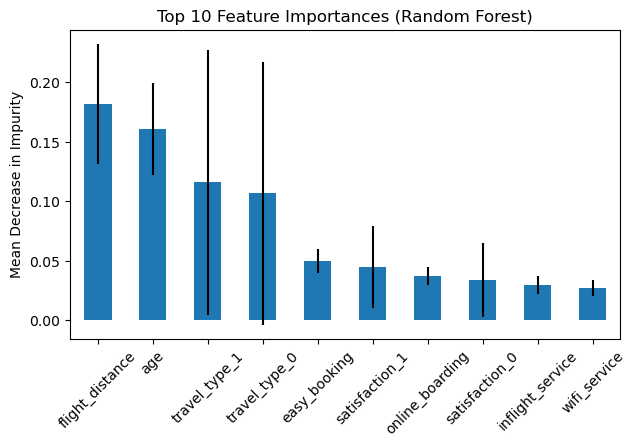

In [174]:
#Calculate the mean and standard deviation of the feature importances.
feature_importances = grid.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_], axis=0)

#Convert importances into series with feature names as index.
forest_importances = pd.Series(feature_importances, index=X_train.columns)

#Sort by values in descending order. Keep top ten.
forest_importances_sorted = forest_importances.sort_values(ascending=False)
top_ten_features = forest_importances_sorted.head(10)

#Map the top ten features' indices to their positions in the original std array.
top_ten_std_indices = [forest_importances.index.get_loc(feature) for feature in top_ten_features.index]
top_ten_std = std[top_ten_std_indices]

#Plot the top ten features and their importances.
fig, ax = plt.subplots()
top_ten_features.plot.bar(yerr=top_ten_std, ax=ax)
ax.set_title("Top 10 Feature Importances (Random Forest)")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


To find the most important features,  rely on the Gini Importance, also known as Mean Decrease in Impurity (MDI). This calculates the impact of each feature as a sum over the number of splits that include the feature, with adjusted proportion by the number of samples it affects in the splits. We find that the top ten most important factors impacting customer loyalty are flight distance, age, travel type, satisfaction, easy booking, online boarding, gate location, wifi service, and whether the departure/arrival time of a flight is convenient.

Travel type is present, telling us that business customers are more likely to be loyal, as company programs only book with approved travel partners. Personal travelers are more likely to be disloyal, making airline choices that are based on personal convenience.

Interestingly, it's find that whether someone is younger or older can impact their status as a loyal customer, likely because as we age, our loyalties and preferences are more set in stone. Factors like departure/arrival convenience impact loyalty, likely because customers may consider switching loyalties for the convenience of flying airlines leaving/arriving at more convenient times. Regarding flight distance, some flights may not be offered for all countries, so customers may consider switching airlines to fly to a destination with a more convenient flight path.

We also analyze the different aspects of customer service that impacts loyalty. For example, an airline lacking ease of booking might shed loyal customers, who want to book but can't figure out where or how to do so. A loyal customer who can't find the gate location of their flight, or who has to navigate a maze of an airport with little success, might vow never to use the airline again.

Next, gradient boosting methodology is used to further refine our results.

### Gradient Boosting

In [175]:
#Set up a gradient boosted tree classifier.
gbrt = GradientBoostingClassifier().fit(X_train, y_train)

In [176]:
#Set reasonable hyperparameters.
np.set_printoptions(precision=6, suppress=True)
param_grid = {'learning_rate': np.logspace(-3, 0, 3),
              'n_estimators': [5, 10, 25, 50, 75],
              'max_depth': [2, 4, 6]}

In [177]:
#Use 5-fold GridSearchCV on the train set.
grid_gbrt = GridSearchCV(gbrt, param_grid=param_grid, cv=5, return_train_score=True)
grid_gbrt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.001   , 0.031623, 1.      ]),
                         'max_depth': [2, 4, 6],
                         'n_estimators': [5, 10, 25, 50, 75]},
             return_train_score=True)

In [178]:
#Report the best model’s performance on the test set
grid_gbrt.best_params_
print("Best estimator:\n{}".format(grid_gbrt.best_estimator_))
accuracy_gbrt = grid_gbrt.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid_gbrt.__class__.__name__, accuracy_gbrt))

Best estimator:
GradientBoostingClassifier(learning_rate=1.0, max_depth=4, n_estimators=50)
Accuracy score of the GridSearchCV is 0.979


In [179]:
# Predict probabilities on the test set using the trained model
y_pred_proba_gbrt = grid_gbrt.predict_proba(X_test)

# Calculate the AUC score
auc_score_gbrt = roc_auc_score(y_test, y_pred_proba_gbrt[:, 1])

print('AUC score on the test set:', auc_score_gbrt)

AUC score on the test set: 0.9956879037141881


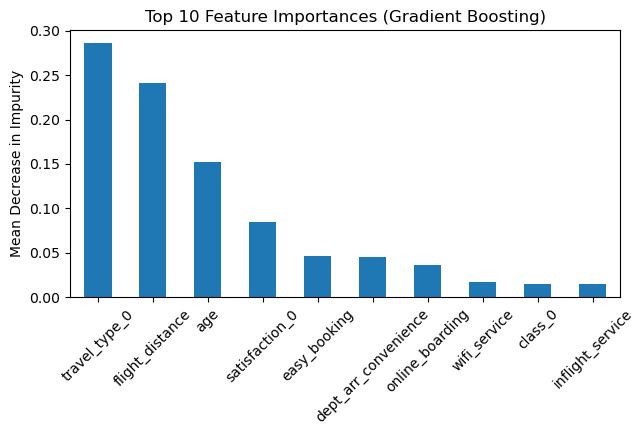

In [180]:
# Calculate the feature importances
feature_importances_gb = grid_gbrt.best_estimator_.feature_importances_

# Convert importances into series with feature names as index
forest_importances_gb = pd.Series(feature_importances_gb, index=X_train.columns)

# Sort by values in descending order. Keep top ten.
top_ten_features_gb = forest_importances_gb.sort_values(ascending=False).head(10)

# Plot the top ten features and their importances
fig, ax = plt.subplots()
top_ten_features_gb.plot.bar(ax=ax)
ax.set_title("Top 10 Feature Importances (Gradient Boosting)")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.xticks(rotation=45)
plt.show()

### Prediction2 Summary

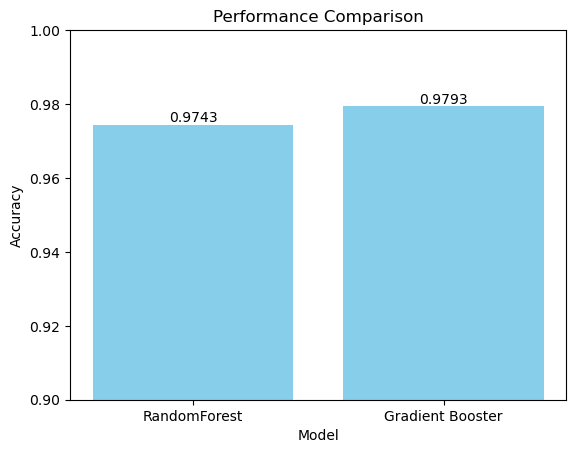

In [181]:
model_accuracy = [accuracy, accuracy_gbrt]
model = ['RandomForest', 'Gradient Booster']

bars = plt.bar(model, model_accuracy, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.title('Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels by 45 degrees
plt.ylim(0.9, 1.0)  # Set y-axis limits to start from 0.5
plt.show()

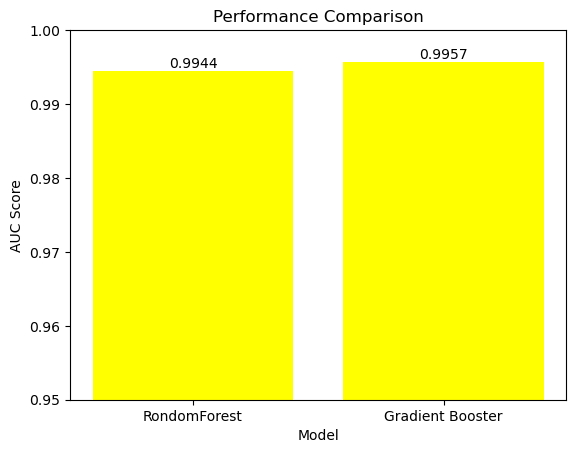

In [182]:
model_auc = [auc_score_rf, auc_score_gbrt]
model = ['RondomForest', 'Gradient Booster']

bars = plt.bar(model, model_auc, color='yellow')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.title('Performance Comparison')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.xticks(rotation=0)
plt.ylim(0.95, 1.0)
plt.show()

With our gradient boosting model, most of our previously-classified top important features (travel type, flight distance, age) are still present and relevant, although they differ in magnitude. It's interesting to see how extremes of certain features, like whether flights have low or high ease of booking, are represented in the new model. High cleanliness on flights contributes to loyalty, as do low satisfaction scores contribute to disloyalty.

## **Conclusion & Summary please see report**